**FRUIT IMAGE CLASSIFICATION BY VISHAL**

In [ ]:
!nvidia-smi

Sat Jul 26 05:12:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=" YOUR API KEY ")
project = rf.workspace("fruit-zkyzw").project("fruit-hvyvg")
version = project.version(11)
dataset = version.download("yolov11")

#sign in to roboflow
#select your dataset
#go to download fork section
#select download with YOLOV11
#copy the code and past here

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit-11 in yolov11:: 100%|██████████| 24164/24164 [00:06<00:00, 3464.70it/s]


In [ ]:
dataset.location

'/content/fruit-11'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=30 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 304MB/s]
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruit-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

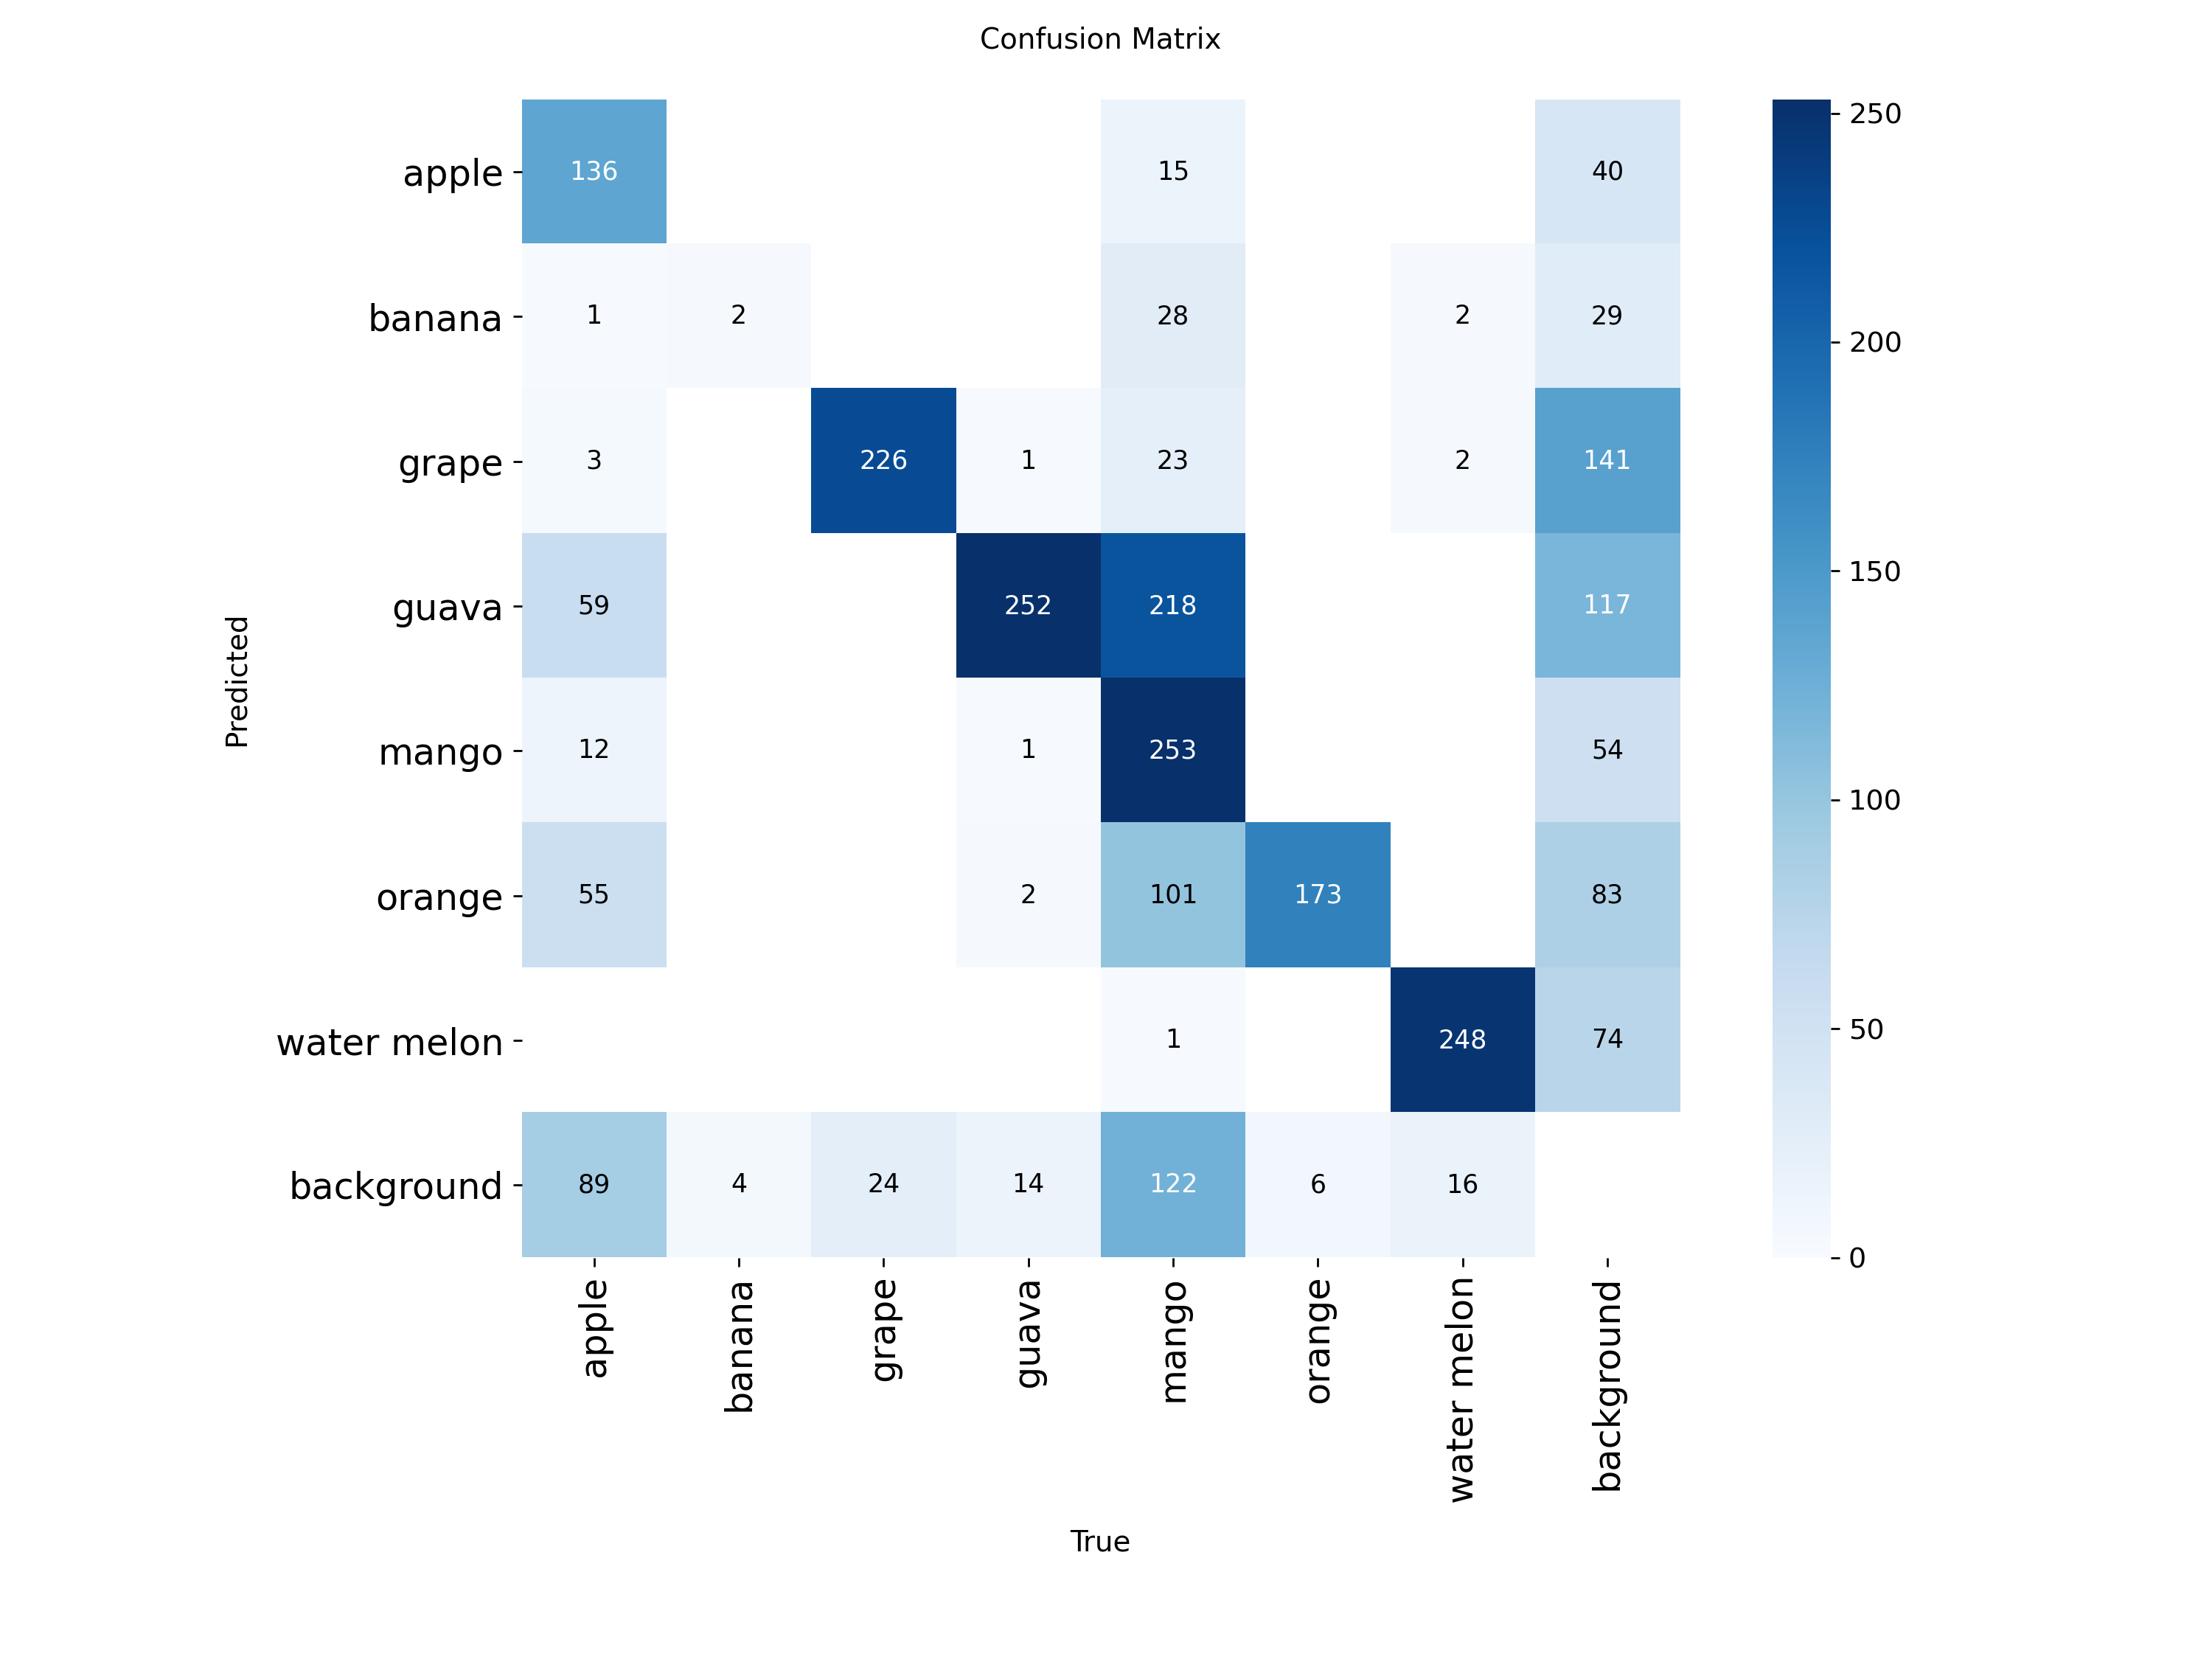

In [ ]:
  Image("/content/runs/detect/train/confusion_matrix.png", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1452.5±198.4 MB/s, size: 40.7 KB)
val: Scanning /content/fruit-11/valid/labels.cache... 707 images, 0 backgrounds, 0 corrupt: 100% 707/707 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 45/45 [00:07<00:00,  6.23it/s]
                   all        707       2089      0.621      0.619      0.668      0.536
                 apple         95        355      0.821      0.349      0.632      0.526
                banana          2          6      0.044      0.167      0.028     0.0137
                 grape        112        250       0.69      0.828      0.849      0.643
                 guava        113        270       0.46      0.887      0.658      0.511
                 mango        225        761      0.921  

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/655 /content/fruit-11/test/images/-00001_jpeg_jpg.rf.b81d0ec693268790dde0b2f34f10c82c.jpg: 640x640 1 apple, 13.2ms
image 2/655 /content/fruit-11/test/images/-00002_jpeg_jpg.rf.62f3ee461272cda4cda7a38a45228559.jpg: 640x640 1 apple, 13.0ms
image 3/655 /content/fruit-11/test/images/-00002_jpeg_jpg.rf.d42d59f2f82639f48437f7e3d394de28.jpg: 640x640 1 apple, 1 water melon, 11.0ms
image 4/655 /content/fruit-11/test/images/-00012_jpeg_jpg.rf.b75770d962625c005bab160c57a48dff.jpg: 640x640 1 apple, 10.8ms
image 5/655 /content/fruit-11/test/images/-00037_jpeg_jpg.rf.c9edbf68fedf5d16727c590985551435.jpg: 640x640 1 apple, 13.6ms
image 6/655 /content/fruit-11/test/images/-00042_jpeg_jpg.rf.f25457c3deb761089493b18039caa276.jpg: 640x640 1 apple, 10.1ms
image 7/655 /content/fruit-11/test/images/-00047_jpeg_jpg.rf.14b2b7085a1623336f8

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/474748-one-mango-on-plain-background.jpg" save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/474748-one-mango-on-plain-background.jpg: 448x640 1 orange, 72.0ms
Speed: 6.0ms preprocess, 72.0ms inference, 204.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/apple_158989157.jpg" save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/apple_158989157.jpg: 640x640 1 apple, 11.4ms
Speed: 4.5ms preprocess, 11.4ms inference, 193.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
